In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings('ignore')

In [2]:
d,m=pd.read_csv('deliveries.csv'),pd.read_csv('matches.csv')

In [3]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
m.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
m.shape,d.shape

((756, 18), (179078, 21))

In [6]:
totalruns=d.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
totalruns

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [7]:
firstinn=totalruns[totalruns['inning'] == 1]

In [8]:
firstinn

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
firstinn['total_runs']=firstinn['total_runs'].map(lambda x:x+1)
firstinn

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [10]:
m.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
mdf=m.merge(firstinn[['match_id','total_runs']],left_on='id',right_on='match_id')
mdf

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [12]:
mdf['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
teams = ['Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore',
       'Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings', 'Rajasthan Royals','Delhi Capitals']

In [14]:
mdf[['team1','team2']]=mdf[['team1','team2']].replace('Delhi Daredevils','Delhi Capitals').replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
mdf=mdf[mdf['team1'].isin(teams)]
mdf=mdf[mdf['team2'].isin(teams)]

In [16]:
mdf['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [17]:
mdf=mdf[mdf['dl_applied'] == 0]

In [18]:
mdf=mdf[['match_id','city','winner','total_runs']]

In [19]:
mdf

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [20]:
delivery_df=mdf.merge(d,on='match_id')

In [21]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [22]:
delivery_df[['batting_team','bowling_team','winner']]=delivery_df[['batting_team','bowling_team','winner']].replace('Delhi Daredevils','Delhi Capitals').replace('Deccan Chargers','Sunrisers Hyderabad')

In [23]:
#total_run_x is the score of 1st inning whereas total_run_y is the score of second inning, so to get total run of 2nd inning, so we will do group by match id and will apply cummulative sum
##Current score of particular match
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [24]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,4,0,4,NaN,NaN,NaN,4
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,NaN,NaN,NaN,4
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,2,2,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,304
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,306
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,307
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,309


In [25]:
#runs left in the match
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [26]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,0,208
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,0,208
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,4,0,4,NaN,NaN,NaN,4,204
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,NaN,NaN,NaN,4,204
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,2,2,NaN,NaN,NaN,6,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,304,-151
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,306,-153
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,307,-154
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,309,-156


In [27]:
delivery_df['balls_left'] = 126 -(delivery_df['over']*6+delivery_df['ball'])

In [28]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,NaN,NaN,NaN,0,208,119
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,NaN,NaN,NaN,0,208,118
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,4,0,4,NaN,NaN,NaN,4,204,117
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,NaN,NaN,NaN,4,204,116
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,2,2,NaN,NaN,NaN,6,202,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,304,-151,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,306,-153,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,307,-154,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,309,-156,1


In [29]:
delivery_df['player_dismissed'].unique()

array([nan, 'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'Vishnu Vinod', 'P Negi', 'AP Tare', 'KK Nair', 'SW Billings',
       'SV Samson', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'RR Pant',
       'S Nadeem', 'G Gambhir', 'RV Uthappa', 'CA Lynn', 'YK Pathan',
       'SA Yadav', 'CR Woakes', 'SP Narine', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'KH Pandya', 'KA Pollard', 'N Rana', 'M Vohra',
       'AR Patel', 'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha',
       'Rashid Khan', 'MP Stoinis', 'HM Amla', 'GJ Maxwell', 'DA Miller',
       'WP Saha', 'MM Sharma', 'VR Aaron', 'V Kohli', 'AB de Villiers',
       'MJ McClenaghan', 'MK Pandey', 'C de Grandhomme', 'SS Iyer',
       'EJG Morgan', 'KC Cariappa', 'AD Mathews', 'Mohammad Nabi',
       'I Sharma', 'KS Williamson', 'SE Marsh', 'Harbhajan Singh',
       'HH Pa

In [30]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)

In [31]:
delivery_df['player_dismissed'].unique()

array([0, 'DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'Mandeep Singh', 'CH Gayle', 'KM Jadhav', 'TM Head', 'Sachin Baby',
       'STR Binny', 'SR Watson', 'S Aravind', 'TS Mills', 'YS Chahal',
       'Vishnu Vinod', 'P Negi', 'AP Tare', 'KK Nair', 'SW Billings',
       'SV Samson', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'RR Pant',
       'S Nadeem', 'G Gambhir', 'RV Uthappa', 'CA Lynn', 'YK Pathan',
       'SA Yadav', 'CR Woakes', 'SP Narine', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'KH Pandya', 'KA Pollard', 'N Rana', 'M Vohra',
       'AR Patel', 'DJ Hooda', 'BCJ Cutting', 'V Shankar', 'NV Ojha',
       'Rashid Khan', 'MP Stoinis', 'HM Amla', 'GJ Maxwell', 'DA Miller',
       'WP Saha', 'MM Sharma', 'VR Aaron', 'V Kohli', 'AB de Villiers',
       'MJ McClenaghan', 'MK Pandey', 'C de Grandhomme', 'SS Iyer',
       'EJG Morgan', 'KC Cariappa', 'AD Mathews', 'Mohammad Nabi',
       'I Sharma', 'KS Williamson', 'SE Marsh', 'Harbhajan Singh',
       'HH Pand

In [32]:
delivery_df['player_dismissed'] = np.where(delivery_df['player_dismissed'] == 0,0,1)

In [33]:
delivery_df['player_dismissed'].unique()

array([0, 1])

In [34]:
delivery_df['wickets'] = 10 - (delivery_df.groupby('match_id').cumsum()['player_dismissed'].values)

In [35]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,NaN,NaN,0,208,119,10
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,NaN,NaN,0,208,118,10
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,4,0,4,0,NaN,NaN,4,204,117,10
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,NaN,NaN,4,204,116,10
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,2,2,0,NaN,NaN,6,202,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,304,-151,4,-3
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,306,-153,3,-3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,307,-154,2,-4
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,309,-156,1,-4


In [36]:
delivery_df['curr_run_rate'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [37]:
delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

In [38]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,curr_run_rate,req_run_rate
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,NaN,NaN,0,208,119,10,0.0,10.487395
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,NaN,NaN,0,208,118,10,0.0,10.576271
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,4,0,NaN,NaN,4,204,117,10,8.0,10.461538
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,NaN,NaN,4,204,116,10,6.0,10.551724
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,2,0,NaN,NaN,6,202,115,10,7.2,10.539130


In [39]:
# def result(row):
#     return 1 if row['batting_team'] == row['winner'] else 0

# delivery_df['result'] = delivery_df.apply(result,1)

#################OR

delivery_df['result'] = np.where(delivery_df['batting_team'] == delivery_df['winner'] , 1, 0)

0    76215
1    73363
Name: result, dtype: int64

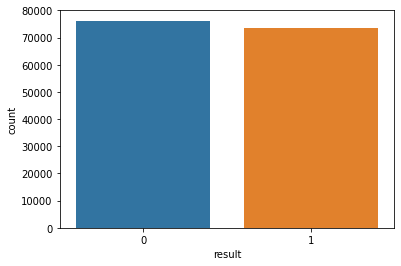

In [40]:
sns.countplot(delivery_df['result'])
delivery_df['result'].value_counts()

In [41]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'curr_run_rate', 'req_run_rate',
       'result'],
      dtype='object')

In [42]:
final_df = delivery_df[['batting_team','bowling_team','city','total_runs_x','curr_run_rate','req_run_rate','wickets','balls_left','result']]

In [43]:
final_df = final_df[final_df['balls_left'] != 0]

In [44]:
final_df.dropna(inplace=True)

In [45]:
final_df[(final_df['req_run_rate']!=0)]

,batting_team,bowling_team,city,total_runs_x,curr_run_rate,req_run_rate,wickets,balls_left,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,0.000000,10.487395,10,119,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,0.000000,10.576271,10,118,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,8.000000,10.461538,10,117,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,6.000000,10.551724,10,116,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,7.200000,10.539130,10,115,1
...,...,...,...,...,...,...,...,...,...
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.808696,-180.000000,-3,5,0
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.724138,-226.500000,-3,4,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.692308,-306.000000,-3,3,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.610169,-462.000000,-4,2,0


In [46]:
final_df.result.value_counts()

0    74838
1    72225
Name: result, dtype: int64

In [62]:
final_df.city.unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru'], dtype=object)

In [47]:
# notdone = final_df[final_df["result"] == 0]
# done = final_df[final_df["result"] == 1]

# # Resampling the original dataset with 1,95,482 datapoints for both classes
# notdone_resample = notdone.sample(n = 72225, random_state = 193)
# done_resample = done.sample(n = 72225, random_state = 193)
# df_eda=final_df.copy()
# # Creating new dataset consisting of equal class occurence 
# df = pd.concat([notdone_resample, done_resample], axis = 0)

In [48]:
x = final_df.drop('result',1)
y = final_df['result']

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [50]:
c = final_df.select_dtypes(include='O').columns
cf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')

In [51]:
# c = final_df.select_dtypes(include='O').columns
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for i in c:
#     x[i] = le.fit_transform(x[i]) 

In [52]:
x

,batting_team,bowling_team,city,total_runs_x,curr_run_rate,req_run_rate,wickets,balls_left
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,0.000000,10.487395,10,119
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,0.000000,10.576271,10,118
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,8.000000,10.461538,10,117
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,6.000000,10.551724,10,116
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,7.200000,10.539130,10,115
...,...,...,...,...,...,...,...,...
149572,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.808696,-180.000000,-3,5
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.724138,-226.500000,-3,4
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.692308,-306.000000,-3,3
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,153,15.610169,-462.000000,-4,2


In [53]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x = sc.fit_transform(x)

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=193)
print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
print('y_test shape',x_test.shape,'y_test shape',y_test.shape)

x_train shape (117650, 8) y_train shape (117650,)
y_test shape (29413, 8) y_test shape (29413,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()

In [56]:
pipe=Pipeline(steps=[('step1',cf),('step2',LogisticRegression(solver='liblinear'))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [57]:
ypred=pipe.predict(x_test)

In [58]:
pipe.predict_proba(x_test)[10]

array([0.53835726, 0.46164274])

In [59]:
pipe1=Pipeline(steps=[('step1',cf),('step2',RandomForestClassifier())])
pipe1.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [60]:
pipe1.predict_proba(x_test)[10]

array([0.97, 0.03])

In [61]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))